# BitTiger DS501 Week6

1. [基本觀念](#基本觀念)
2. [PCA](#PCA)
3. [Matrix Factorization](#Matrix-Factorization)
   * [SVD](#SVD)
   * [NMF](#NMF)
   * [UVD](#UVD)
4. [比較](#比較)
5. [Recommendation](#Recommendation)
   * [Item-item collaborative filter recommender](#Item-item-collaborative-filter-recommender)
   * [Item-item collaborative filter recommender OOP](#Item-item-collaborative-filter-recommender-OOP)
6. [Graphlab](#)

# 基本觀念

* 當 dimension 越多的時候，model 的 features 會越多，所以越容易造成 overfitting 的問題

* Linear regression 和 kNN 兩個都是 **distance based** model
  * Linear regression 是相對比較**穩定**的 model，比較不容易 overfitting
    * 因為是用一條線來決定的，可能有些數據點就 fit 不準，所以 bias 就比較高，但是用不同的樣本來看的時候，不同樣本間 fit 出來的差別比較小，所以 variance 就比較低
    * **Low variance, high bias**
  * kNN 的 bias 和 variance 是由 k 決定的
    * k 小的時候 fit 的很準，所以 bias 小，但是換用不同樣本來看的時候，fit 的結果就不準了，所以 variance 大
    * **k 小： bias 小，variance 大**
    * **k 大： bias 大，variance 小**
    * 一般來說 kNN 希望用 k 大一點的
    * 用 kNN 時希望能框進 **10%** 的數據
* kMeans 也是 distance based model

* 空間的維度越高時，數據點彼此之間的分佈距離就比較遠，所以分佈就比較稀疏，因此需要用更大的空間範圍才能框住所需的數據量
  * 維度越高，用來框住數據的圓的半徑就要越大 (如果是用立方體框住，那邊長就要越長)，才能框住所需要的數據的數量
  * 在 $p$ 維空間中，有 N 個數據點
    * 樣本密度是 $N^{1/p}$
    * 如果想框住單位立方體的 $v$% 的數據，用來框住數據的立方體的邊長是 $e_{p} = v^{1/p}$

* Distance based model 在維度變高時，數據點彼此間的距離變遠，就容易出現問題
  * Dimension 增加了，就會帶來新的 noise
  * 數據彼此距離變遠了，對變化就比較不敏感
  * 不是 dimension 增加就會造成 overfitting，要看新增加的 dimension 時代來的 noise 的影響
    * relevant dimension 不會影響 performance
    * irrelevant dimension 會帶來 noise 因此影響 performance

# PCA

* PCA 是 **principal component analysis** 的縮寫
* PCA 主要是要找到一組新的座標軸 (principal components) 然後旋轉座標軸到新的座標軸 (主軸) 上，這樣可以 **使 covariance 消失，進而解決 multi-collinearity 的問題**
  * N 維的空間，就能找到 N 個 principal components
  * **principal components 彼此互相垂直**
  * principal components 就是**能最大的描述 variance 方向的主軸**
    * First principal component 就是 variance 的投影最大的那個軸
  * 旋轉到新的座標軸後，交叉項就會消失，所以就沒有 covariance，也就可以解決 collinearity 的問題

* Covariance:
\begin{equation} cov(X, Y) = \sum_i \frac{(X_i - \bar{X})(Y_i - \bar{Y})}{N} \end{equation}
* 給定一個 $n \times m$ 的矩陣 $X$，它的 covariance matrix 是：
  * 當 data 是母體時: \begin{equation} \frac{1}{n}X^{T}X \end{equation}
  * 當 data 是樣本時: \begin{equation} \frac{1}{n-1}X^{T}X \end{equation}

* 做 PCA 時不一定要先對數據做 standardization
  * Standardization 就是使分佈變成 mean = 0, variance = 1
  * \begin{equation}x' = \frac{x - \mu}{\sigma} \end{equation}

* 數學上來說，給定矩陣 $M$，PCA 就是要找到一個 transformation matrix $V$ 把 $M^T M$ 對角化，使得 $M^T M$ 只有對角線元素是非零 (這樣就沒有交叉項，也就沒有 covariance 了)
  * 就是要**把 $M^T M$ 對角化求本徵值的過程**
    * eigenvectors 是新的基底
    * eigenvalues 是在這個新的基底上的 variance
    * $M^T M$ 的 eigenvalues 其實是 $M$ 的 singular value 的平方
  * $V$ 的元素彼此互相正交歸一
    * $V^T V = I$, $V^T = V^{-1}$
    * $V$ 也是 unitary matrix: $V^{*} = V^{-1}$ (矩陣的共軛轉置 = 逆矩陣)
* 把矩陣 $A$ 對角化就表示把 $A$ 寫成 $PDP^{-1}$ 的形式
  * $D$ 是由 eigenvalues 組成的對角矩陣
  * $P$ 是由 eigenvectors 當成每一個 column 組成的矩陣
  * 求解 eigenvalue equation: $(A - \lambda I)x = 0$
* PCA 後，新空間中的每個 component 其實是舊的空間中的 components 的疊加，所以**模型解釋能力比較差**
* PCA 可以幫助 data compression
  * $M$ 是 feature matrix
  * 把 eigenvalues 由大排到小，可以藉由把小的 eigenvalues 丟掉，達成 dimension reduction 的目的
  * 因為 $MV$ 是被降維了所以檔案大小也變小了，但是只要知道 $MV$ 和 $V$ 的形式，可推算回去得到 $M$
  * 保留的 principal components 越多的話，恢復成原本的 $M$ 的時候，恢復的程度就會越好
  * 保留的 principal components 越多的話，對原始的數據中解釋 variance 的能力就越好

### Load Data

In [1]:
import pandas as pd
import numpy as np

df_hitters = pd.read_csv('hitters.csv')

df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [2]:
# Dropping NAs
df_hitters.dropna(inplace=True) # 只要有 missing value 就把該 row 丟掉，會剩下 263 rows

In [3]:
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Division, League, NewLeague 三個是 object 的型態

In [4]:
df_hitters['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [5]:
df_hitters['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [6]:
df_hitters['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

### Data cleaning

因為 Division, League, NewLeague 都只有兩個值，所以把他們改成 binary 的形式

In [7]:
def map_binary(df, col):
    vals = df[col].unique()
    df[col] = df[col].apply(lambda x: 0 if x == vals[0] else 1)

In [8]:
map_binary(df_hitters, 'League')
map_binary(df_hitters, 'NewLeague')
map_binary(df_hitters, 'Division')

In [9]:
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


### Get features and target

In [10]:
feature_names = df_hitters.columns.difference(['Salary']) # 選出除了 salary 之外的 features
print(feature_names)

Index(['Assists', 'AtBat', 'CAtBat', 'CHits', 'CHmRun', 'CRBI', 'CRuns',
       'CWalks', 'Division', 'Errors', 'Hits', 'HmRun', 'League', 'NewLeague',
       'PutOuts', 'RBI', 'Runs', 'Walks', 'Years'],
      dtype='object')


In [11]:
X = df_hitters[feature_names].astype(float).values
y = df_hitters['Salary'].values

In [12]:
print(X.shape)
X

(263, 19)


array([[4.300e+01, 3.150e+02, 3.449e+03, ..., 2.400e+01, 3.900e+01,
        1.400e+01],
       [8.200e+01, 4.790e+02, 1.624e+03, ..., 6.600e+01, 7.600e+01,
        3.000e+00],
       [1.100e+01, 4.960e+02, 5.628e+03, ..., 6.500e+01, 3.700e+01,
        1.100e+01],
       ...,
       [1.130e+02, 4.750e+02, 1.700e+03, ..., 6.100e+01, 5.200e+01,
        6.000e+00],
       [1.310e+02, 5.730e+02, 3.198e+03, ..., 8.500e+01, 7.800e+01,
        8.000e+00],
       [4.000e+00, 6.310e+02, 4.908e+03, ..., 7.700e+01, 3.100e+01,
        1.100e+01]])

In [13]:
print(y.shape) # y 是一個一維的 vector
y

(263,)


array([ 475.   ,  480.   ,  500.   ,   91.5  ,  750.   ,   70.   ,
        100.   ,   75.   , 1100.   ,  517.143,  512.5  ,  550.   ,
        700.   ,  240.   ,  775.   ,  175.   ,  135.   ,  100.   ,
        115.   ,  600.   ,  776.667,  765.   ,  708.333,  750.   ,
        625.   ,  900.   ,  110.   ,  612.5  ,  300.   ,  850.   ,
         90.   ,   67.5  ,  180.   ,  305.   ,  215.   ,  247.5  ,
        815.   ,  875.   ,   70.   , 1200.   ,  675.   ,  415.   ,
        340.   ,  416.667, 1350.   ,   90.   ,  275.   ,  230.   ,
        225.   ,  950.   ,   75.   ,  105.   ,  320.   ,  850.   ,
        535.   ,  933.333,  850.   ,  210.   ,  325.   ,  275.   ,
        450.   , 1975.   , 1900.   ,  600.   , 1041.667,  110.   ,
        260.   ,  475.   ,  431.5  , 1220.   ,   70.   ,  145.   ,
        595.   , 1861.46 ,  300.   ,  490.   , 2460.   ,  375.   ,
        750.   , 1175.   ,   70.   , 1500.   ,  385.   , 1925.571,
        215.   ,  900.   ,  155.   ,  700.   ,  535.   ,  362.

### Stanardization

PCA 不一定要先做 standardization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
print(X_scaled.shape)
X_scaled

(263, 19)


array([[-0.52319133, -0.6029005 ,  0.3467905 , ..., -1.2061115 ,
        -0.0975271 ,  1.3978935 ],
       [-0.25386267,  0.51254171, -0.45286539, ...,  0.44151497,
         1.6093726 , -0.90120024],
       [-0.74417894,  0.62816682,  1.30155773, ...,  0.40228577,
        -0.18979195,  0.77086793],
       ...,
       [-0.03978092,  0.48533581, -0.41956465, ...,  0.24536896,
         0.50219441, -0.27417468],
       [ 0.08452461,  1.15188054,  0.23681043, ...,  1.1868698 ,
         1.70163744,  0.14384237],
       [-0.79251998,  1.54636621,  0.98607705, ...,  0.87303619,
        -0.4665865 ,  0.77086793]])

### Train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(210, 19) (53, 19) (210,) (53,)


### Use PCA to transform data and get principal components

* 見 [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [18]:
from sklearn.decomposition import PCA

n_col = X_train.shape[1]
pca = PCA(n_components=n_col)

train_components = pca.fit_transform(X_train) # fit: get V, lambda; transform: X_train*V
test_components = pca.transform(X_test) # V 已經得到了，所以直接 transform

In [19]:
# PCA 只是旋轉，沒做 dimentional reduction，當然選轉前後的維度是一樣的
print(X_train.shape)
print(train_components.shape)

(210, 19)
(210, 19)


In [20]:
# transformed data in new space has the same dimension as original data
print(X_test.shape)
print(test_components.shape)

(53, 19)
(53, 19)


In [21]:
# transformed by sklearn
train_components

array([[-2.02855553e+00, -1.84097001e+00,  9.21147363e-01, ...,
         3.21250401e-02,  5.24599961e-02, -8.51956406e-03],
       [-2.97187815e+00,  9.21807300e-01,  3.69430093e-01, ...,
         3.17386498e-02, -1.29718569e-02, -3.43185683e-02],
       [ 3.14005490e-01, -1.58427348e+00,  7.49691288e-01, ...,
         1.01271207e-01, -6.31353425e-02,  6.42583056e-03],
       ...,
       [-5.39752641e-01, -2.97714801e+00, -1.75431480e+00, ...,
         3.48245715e-03,  1.83848143e-02, -2.54685970e-04],
       [ 9.75335288e-01,  1.29587667e+00, -7.73556234e-01, ...,
        -1.98216919e-01, -3.02904023e-02, -2.03182703e-03],
       [-2.57546893e+00, -8.00353440e-01,  3.67953464e-01, ...,
         3.59723741e-02,  9.75997678e-02, -2.16196979e-02]])

比較一下由 PCA package 算出來的 $MV$ 矩陣和自己算出來的 $MV$ 矩陣是否相同

In [22]:
# transformed by M*V in class, they are equivalent!
train_components_2 = X_train.dot(pca.components_.T) # pca.components_ 是 V^T 所以要轉置回 V
train_components_2

array([[-2.00909129e+00, -1.82675499e+00,  9.42608865e-01, ...,
         2.04606195e-02,  5.42872823e-02, -8.73800486e-03],
       [-2.95241391e+00,  9.36022324e-01,  3.90891594e-01, ...,
         2.00742292e-02, -1.11445707e-02, -3.45370091e-02],
       [ 3.33469729e-01, -1.57005845e+00,  7.71152789e-01, ...,
         8.96067867e-02, -6.13080563e-02,  6.20738976e-03],
       ...,
       [-5.20288402e-01, -2.96293298e+00, -1.73285330e+00, ...,
        -8.18196347e-03,  2.02121005e-02, -4.73126773e-04],
       [ 9.94799527e-01,  1.31009169e+00, -7.52094732e-01, ...,
        -2.09881340e-01, -2.84631161e-02, -2.25026784e-03],
       [-2.55600469e+00, -7.86138415e-01,  3.89414965e-01, ...,
         2.43079534e-02,  9.94270540e-02, -2.18381387e-02]])

In [23]:
print(train_components_2.shape, pca.components_.shape)

(210, 19) (19, 19)


In [24]:
train_components_2 - train_components # 自己算的和 sklearn 算的仍然有一點差別，不過差別不大，兩者大致相等

array([[ 0.01946424,  0.01421502,  0.0214615 , ..., -0.01166442,
         0.00182729, -0.00021844],
       [ 0.01946424,  0.01421502,  0.0214615 , ..., -0.01166442,
         0.00182729, -0.00021844],
       [ 0.01946424,  0.01421502,  0.0214615 , ..., -0.01166442,
         0.00182729, -0.00021844],
       ...,
       [ 0.01946424,  0.01421502,  0.0214615 , ..., -0.01166442,
         0.00182729, -0.00021844],
       [ 0.01946424,  0.01421502,  0.0214615 , ..., -0.01166442,
         0.00182729, -0.00021844],
       [ 0.01946424,  0.01421502,  0.0214615 , ..., -0.01166442,
         0.00182729, -0.00021844]])

In [25]:
print(pca.explained_variance_.shape)
print(pca.explained_variance_) # 就是 MV 矩陣的 eigenvalues

(19,)
[7.56733469e+00 3.98232312e+00 2.04325163e+00 1.54072808e+00
 1.00933404e+00 9.08124193e-01 6.62728000e-01 5.06370398e-01
 2.70493145e-01 1.88395977e-01 1.39803988e-01 1.25858373e-01
 9.08781392e-02 5.92594793e-02 4.81093115e-02 2.96732593e-02
 1.26893318e-02 4.35333522e-03 1.13582781e-03]


In [26]:
# Inspect the principal axes in feature space
print(pca.components_.shape) # n_components x n_features 所以是 V^T
print(pca.components_)

(19, 19)
[[ 7.33922745e-03  1.85145295e-01  3.36008029e-01  3.36905477e-01
   3.35835564e-01  3.49372342e-01  3.46247730e-01  3.19102624e-01
   2.53013254e-02  3.29534159e-03  1.82511115e-01  1.98354238e-01
   3.47853584e-02  2.20743882e-02  8.83588003e-02  2.21314711e-01
   1.83961529e-01  1.92798009e-01  2.82660046e-01]
 [-1.37002768e-01 -3.81492386e-01  1.86991507e-01  1.80441490e-01
   1.15909883e-01  1.56138406e-01  1.70952144e-01  1.78633694e-01
  -3.27674496e-02 -1.54880591e-01 -3.72073299e-01 -2.51217970e-01
  -1.27159074e-01 -1.01794027e-01 -2.08825037e-01 -3.23837913e-01
  -3.77329322e-01 -2.47807859e-01  2.52611764e-01]
 [ 3.84771453e-01  1.17328883e-01  7.04590089e-02  7.38795193e-02
  -1.21472562e-01 -2.67944585e-03  3.01995021e-02  9.95068060e-03
  -1.47571051e-02  3.60320765e-01  1.08814533e-01 -2.07127440e-01
  -5.52209410e-01 -5.57386744e-01  9.30936280e-02 -4.64561504e-02
  -7.88867772e-04  2.07063688e-02  1.81114538e-02]
 [ 5.17081423e-01  7.91280510e-02  9.36364436e

In [27]:
pca.components_.T.dot(pca.components_) # V^T V 會是一個 identity matrix

array([[ 1.00000000e+00, -7.90915303e-17,  8.55548666e-17,
         5.07885566e-17, -1.59628439e-16, -8.32495039e-17,
         1.91642802e-16, -8.70812429e-17, -4.30550610e-17,
         1.87644683e-16, -3.92174996e-17, -1.42955283e-16,
         4.11475607e-17,  1.72607611e-16,  6.81988636e-17,
        -2.76232842e-16,  1.91392631e-16, -1.56928961e-16,
         1.28632188e-17],
       [-7.90915303e-17,  1.00000000e+00,  7.09390061e-19,
         3.95173480e-16,  9.27233004e-17,  4.44673059e-17,
         7.41593049e-17, -1.53437290e-16, -1.81474068e-16,
        -4.42493172e-16, -6.12032100e-16,  7.86144282e-17,
        -4.52754652e-17, -3.11525165e-17, -1.72487425e-16,
        -2.52641619e-16, -4.19021703e-16, -2.51623338e-17,
         1.51252749e-16],
       [ 8.55548666e-17,  7.09390061e-19,  1.00000000e+00,
        -1.20597757e-16,  8.90093246e-17,  1.26402827e-16,
        -1.75862805e-16,  3.79172619e-16, -1.42725117e-16,
        -1.50628285e-16,  7.00571919e-17,  1.70684622e-16,
    

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

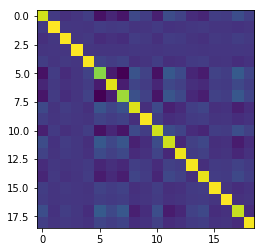

In [29]:
plt.imshow(np.cov(pca.components_.T)) # 看 V 的 covariance matrix
plt.show()

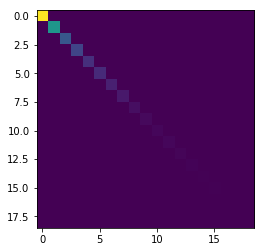

In [30]:
# visualize the covariance of transformed feature matrix
plt.imshow(np.cov(train_components.T)) # 看 MV 的 covariance matrix，只剩下對角線有值
plt.show()

### Let's do it by solving eigenvalue problem and compare

比較自己算出來的 eigenvalues 和 eigenvectors 和用 PCA package 算出來的有什麼差別

In [31]:
import copy
from numpy.linalg import eigh

# fit
cov_train = np.cov(X_train.T) # X_train 是 210x19, 所以 (X_train)^T X_train 是要 19x19，如果用 np.cov(X_train) 是 210x210
lambdas, v = eigh(cov_train) # 這時候求出的 lambdas 是遞增排列的

# eigh order lambda from small to large, so flip
lambdas = lambdas[::-1] # 把 lambdas 改成遞減排列
v = -np.flip(v, axis=1) # lambdas 的順序改了 對應的 eigenvector 的順序也要改，只是為什麼要加上負號？

print(lambdas.shape)
print(v.shape)

(19,)
(19, 19)


In [32]:
# compare variances
print(pca.explained_variance_) # 就是 eigenvalues
print(lambdas)

[7.56733469e+00 3.98232312e+00 2.04325163e+00 1.54072808e+00
 1.00933404e+00 9.08124193e-01 6.62728000e-01 5.06370398e-01
 2.70493145e-01 1.88395977e-01 1.39803988e-01 1.25858373e-01
 9.08781392e-02 5.92594793e-02 4.81093115e-02 2.96732593e-02
 1.26893318e-02 4.35333522e-03 1.13582781e-03]
[7.56733469e+00 3.98232312e+00 2.04325163e+00 1.54072808e+00
 1.00933404e+00 9.08124193e-01 6.62728000e-01 5.06370398e-01
 2.70493145e-01 1.88395977e-01 1.39803988e-01 1.25858373e-01
 9.08781392e-02 5.92594793e-02 4.81093115e-02 2.96732593e-02
 1.26893318e-02 4.35333522e-03 1.13582781e-03]


In [33]:
lambdas - pca.explained_variance_ # 兩者不是一模一樣，有點差異，但是很接近

array([-4.44089210e-15, -3.10862447e-15,  2.22044605e-15,  2.22044605e-16,
       -2.88657986e-15, -2.22044605e-15, -1.44328993e-15, -2.22044605e-16,
        5.55111512e-17,  5.55111512e-17,  2.47024623e-15, -2.49800181e-16,
        4.16333634e-17, -6.24500451e-16, -7.07767178e-16, -2.84494650e-16,
       -1.49186219e-16,  8.12717948e-16, -6.49437101e-16])

In [34]:
# compare components
v.T - pca.components_ # 也是有微小的差異，不是一模一樣

array([[ 7.80625564e-17,  3.05311332e-16, -5.55111512e-16,
        -3.88578059e-16, -3.88578059e-16, -2.22044605e-16,
        -3.88578059e-16, -2.77555756e-16,  1.73472348e-17,
         8.50014503e-17,  2.22044605e-16,  1.94289029e-16,
         1.24900090e-16,  7.28583860e-17,  2.63677968e-16,
         2.22044605e-16,  2.77555756e-16,  2.49800181e-16,
        -2.77555756e-16],
       [-3.88578059e-16,  0.00000000e+00,  1.38777878e-16,
         3.88578059e-16,  4.30211422e-16,  2.49800181e-16,
         2.49800181e-16,  8.32667268e-17,  4.85722573e-17,
        -2.77555756e-16,  3.88578059e-16,  6.66133815e-16,
        -1.11022302e-16,  5.55111512e-17,  3.05311332e-16,
         3.33066907e-16,  3.88578059e-16,  1.94289029e-16,
         1.66533454e-16],
       [-7.69542907e-01, -2.34657766e-01, -1.40918018e-01,
        -1.47759039e-01,  2.42945124e-01,  5.35889170e-03,
        -6.03990043e-02, -1.99013612e-02,  2.95142102e-02,
        -7.20641530e-01, -2.17629065e-01,  4.14254880e-01,
    

In [35]:
# compare transformed training data
# eigen value solver:
train_components_eig = X_train.dot(v)
train_components_eig

array([[-2.00909129e+00, -1.82675499e+00, -9.42608865e-01, ...,
        -2.04606195e-02, -5.42872823e-02,  8.73800486e-03],
       [-2.95241391e+00,  9.36022324e-01, -3.90891594e-01, ...,
        -2.00742292e-02,  1.11445707e-02,  3.45370091e-02],
       [ 3.33469729e-01, -1.57005845e+00, -7.71152789e-01, ...,
        -8.96067867e-02,  6.13080563e-02, -6.20738976e-03],
       ...,
       [-5.20288402e-01, -2.96293298e+00,  1.73285330e+00, ...,
         8.18196347e-03, -2.02121005e-02,  4.73126773e-04],
       [ 9.94799527e-01,  1.31009169e+00,  7.52094732e-01, ...,
         2.09881340e-01,  2.84631161e-02,  2.25026784e-03],
       [-2.55600469e+00, -7.86138415e-01, -3.89414965e-01, ...,
        -2.43079534e-02, -9.94270540e-02,  2.18381387e-02]])

In [36]:
# sklearn solver:
train_components

# they are equivalent!

array([[-2.02855553e+00, -1.84097001e+00,  9.21147363e-01, ...,
         3.21250401e-02,  5.24599961e-02, -8.51956406e-03],
       [-2.97187815e+00,  9.21807300e-01,  3.69430093e-01, ...,
         3.17386498e-02, -1.29718569e-02, -3.43185683e-02],
       [ 3.14005490e-01, -1.58427348e+00,  7.49691288e-01, ...,
         1.01271207e-01, -6.31353425e-02,  6.42583056e-03],
       ...,
       [-5.39752641e-01, -2.97714801e+00, -1.75431480e+00, ...,
         3.48245715e-03,  1.83848143e-02, -2.54685970e-04],
       [ 9.75335288e-01,  1.29587667e+00, -7.73556234e-01, ...,
        -1.98216919e-01, -3.02904023e-02, -2.03182703e-03],
       [-2.57546893e+00, -8.00353440e-01,  3.67953464e-01, ...,
         3.59723741e-02,  9.75997678e-02, -2.16196979e-02]])

In [37]:
train_components - train_components_eig # 兩者有點差異

array([[-1.94642391e-02, -1.42150248e-02,  1.86375623e+00, ...,
         5.25856596e-02,  1.06747278e-01, -1.72575689e-02],
       [-1.94642391e-02, -1.42150248e-02,  7.60321687e-01, ...,
         5.18128790e-02, -2.41164276e-02, -6.88555775e-02],
       [-1.94642391e-02, -1.42150248e-02,  1.52084408e+00, ...,
         1.90877994e-01, -1.24443399e-01,  1.26332203e-02],
       ...,
       [-1.94642391e-02, -1.42150248e-02, -3.48716811e+00, ...,
        -4.69950632e-03,  3.85969149e-02, -7.27812743e-04],
       [-1.94642391e-02, -1.42150248e-02, -1.52565097e+00, ...,
        -4.08098259e-01, -5.87535183e-02, -4.28209487e-03],
       [-1.94642391e-02, -1.42150248e-02,  7.57368429e-01, ...,
         6.02803275e-02,  1.97026822e-01, -4.34578366e-02]])

### Let's continue with sklearn pca solver

### See how much variance the principal components explain

把每個主軸對應的 eigenvalues 由大到小畫出來

eigenvalues 表示在新的 basis 上的 variance

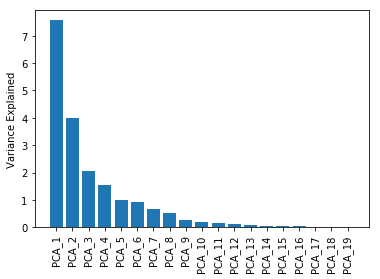

In [38]:
pca_range = np.arange(n_col) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
plt.bar(pca_range, pca.explained_variance_, align='center')
xticks = plt.xticks(pca_range, pca_names, rotation=90)
plt.ylabel('Variance Explained')
plt.show()

### See how much (percentage of) variance the principal components explain

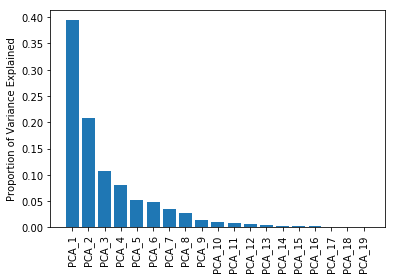

In [39]:
pca_range = np.arange(n_col) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
plt.bar(pca_range, pca.explained_variance_ratio_, align='center') # 這邊用 pca.explained_variance_ratio_
xticks = plt.xticks(pca_range, pca_names, rotation=90)
plt.ylabel('Proportion of Variance Explained')
plt.show()

### How to determine k: percent of variance explained

如果想要保留 90% 的資訊，就畫一條 90% 的水平線，然後看和 cumulative curve 相交在第幾個主軸，就保留那些主軸

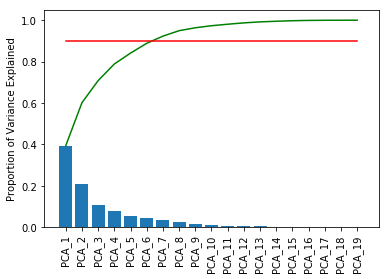

In [40]:
pca_range = np.arange(n_col) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, pca.explained_variance_ratio_, align='center')
plt.plot(pca_range, np.cumsum(pca.explained_variance_ratio_), 'g-')
plt.plot(pca_range, 0.9*np.ones(len(pca_range)), 'r-')

xticks = plt.xticks(pca_range, pca_names, rotation=90)
plt.ylabel('Proportion of Variance Explained')
plt.show()

### Get train and test error with K-Fold cross validation

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

train_mse_arr = np.array([])
test_mse_arr = np.array([])

for i in pca_range:
    train_subset = train_components[:, :i] # 只留下 i 個主軸
    pca_linear = LinearRegression()
    pca_linear.fit(train_subset, y_train)
    # Get train error
    train_mse = cross_val_score(pca_linear, train_subset, y=y_train,
                                scoring='neg_mean_squared_error', cv=10) * -1
    train_mse_arr = np.append(train_mse_arr, train_mse.mean())
    
    # Get test error
    test_set = test_components[:, :i]
    test_mse = mean_squared_error(pca_linear.predict(test_set), y_test)
    test_mse_arr = np.append(test_mse_arr, test_mse)

### Plot train mse

# of PCs that gives lowest train MSE:  7 @ 107809.53579112727


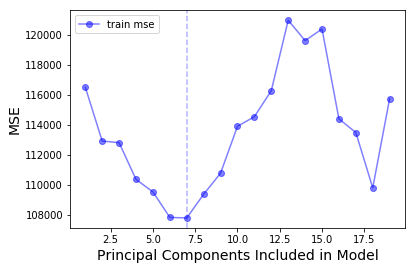

In [42]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_train_mse_pca = np.argmin(train_mse_arr) + 1
min_train_mse  = np.min(train_mse_arr)

plt.axvline(best_train_mse_pca, color='b', ls='--', alpha=.3)

print('# of PCs that gives lowest train MSE: ', best_train_mse_pca, '@', min_train_mse)

### Plot test mse

# of PCs that gives lowest test MSE:  17 @ 125574.01013084406


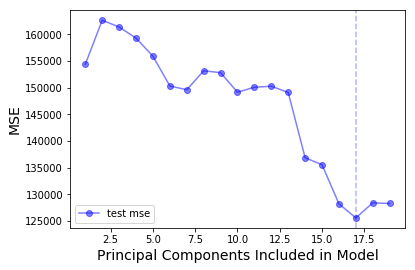

In [43]:
plt.plot(pca_range, test_mse_arr, marker='o', color='b', alpha=.5, label='test mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_test_mse_pca = np.argmin(test_mse_arr) + 1
min_test_mse = np.min(test_mse_arr)

plt.axvline(best_test_mse_pca, color='b', ls='--', alpha=.3)

print('# of PCs that gives lowest test MSE: ', best_test_mse_pca, '@', min_test_mse)

### Plot train and test mse

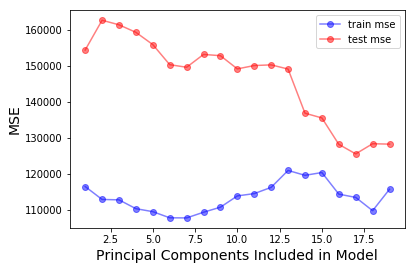

In [44]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.plot(pca_range, test_mse_arr, marker='o', color='r', alpha=.5, label='test mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')
plt.show()

***
***
***

# Matrix Factorization

## Matrix Factorization 分成 SVD, NMF, UVD

* SVD 和 PCA 都是有**解析解**，NMF 和 UVD 都是**數值近似解**
* UVD 其實就是 truncated SVD
* NMF 其實和 UVD 本質上差不多，最主要的差別是 NMF 有 non-negative 的限制

## SVD

* SVD 是 **singular value decomposition**
  * 矩陣 $A$ 不是奇異矩陣，那就一定可以寫成三個矩陣的相乘
    \begin{equation} A_{m \times n} = U_{m \times r} \Lambda_{r \times r} (V_{n \times r})^{T} \end{equation}
    * $A$ 是 $m \times n$: 有 $m$ 個 documents 和 $n$ 個 terms
    * $U$ 是 $m \times r$: 有 $m$ 個 documents 和 $r$ 個 concepts，document-to-concept similarity matrix，document concept indicator
    * $\Lambda$ 是 $r \times r$ 的對角矩陣: 每個元素表示 concept 的強度 (Strength)，不一定需要是 $r \times r$ 的方陣，但是只能對角線上的元素是非零的，其他元素都必須是 0，對角線元素叫做 singular value
    * $V$ 是 $n \times r$: 有 $n$ 個 terms 和 $r$ 個 concepts，term-to-concept similarity matrix，word concept indicator
    * $U$ 和 $V$ 都是正交歸一的矩陣，都是寫成 column matrix
    * **$\Lambda$ 的元素習慣上都是正的，由大排到小** (基本上元素都必須同號，若都是負的就把負號提出來)
    * **concepts 就是 latent factors**
  * $r$ 要選多少，是看要保留多少資料而決定的
  * 要選擇**投影在 sum of square error 最小的軸上**
  * 做 dimensional reduction 時，就是把小的 singular value 丟掉，從最小的開始丟
    * 因為是丟掉，所以會失去一部分的資訊
* Scikit-learn 的 PCA 是用 SVD 來實作的
  * PCA 的 eigenvalues 是 SVD 的 singular value 的平方

## NMF

* NMF 是 **Non-negative Matrix Factorization**
  * 因為現實的情況很多都是 non-negative 的
* 把大矩陣 $V$ 分解成兩個小矩陣 $W$ 和 $H$: \begin{equation}V_{m\times n} = W_{m \times r} H_{r \times n}\end{equation}
  * $V$ 是 $m$ words $\times$ $n$ documents，注意 documents 在這邊是欄位 words 是列
  * $W$ 是 word $\times$ latent factors
  * $H$ 是 latent factors $\times$ documents 
  * $V$ 可以由 $W$ 和 $H$ 來恢復
  * $V_{ij} \ge 0$, $W_{ij} \ge 0$, $H_{ij} \ge 0$
  * $r < min(m, n)$
  * 看作是 $H$ 的每一欄用 $W$ 當成權重然後加起來
* NMF 是一種 relexed kMeans clustering
  * $W$ 是 cluster centeroids
  * $H$ 是 cluster membership indicators
* 因為 NMF 是數值近似解，所以目標是要最小化 $|| V - WH ||^2$，而且 $W_{ij} \ge 0$, $H_{ij} \ge 0$
  * 先隨便初始化 $W$, $H$ 決定形狀 (維度)
  * 固定 $W$ 最小化 $H$ 的 sum of square errors，要確保 $H$ 的每個元素都大於等於 0
  * 等 $H$ 最佳化了，再固定 $H$ 來最小化 $W$ 的 sum of square errors，要確保 $W$ 的每個元素都大於等於 0
  * 更新 $W$ 和 $H$ 的方法有
    * multiplicative update
      * 速度快，實作容易
      * \begin{equation}H_{a\mu} \leftarrow H_{a\mu} \frac{(W^T V)_{a\mu}}{(W^T W H)_{a\mu}}\end{equation}
      * \begin{equation}W_{ia} \leftarrow W_{ia} \frac{(VH^T)_{ia}}{(W H H^T)_{ia}}\end{equation}
    * gradient descent
      * 實作容易，收斂速度慢，和選擇的 step size 有關
  * 要一直更新到什麼時候停止？
    * RMSE 下降
    * iteration 次數達到了
  

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear equation exact solver

\begin{equation}
  \left[
    \begin{array}{cc}
    1&2\\-3&4
    \end{array}
  \right]
  \left[
  \begin{array}{c}
  x_1\\x_2
  \end{array}
  \right]
  =
  \left[
    \begin{array}{c}
    7\\-9
    \end{array}
  \right]
\end{equation}


In [46]:
A = np.array([[1, 2], [-3, 4]])
b = np.array([7, -9])

print(np.linalg.solve(A, b))

[4.6 1.2]


### Least square solver

#### Least squares: find $x$ that minimize the residual sum of squares (RSS)

Overdetermined system of linear equation

\begin{equation}
  \left[
    \begin{array}{cc}
    1&2\\-3&4\\1&-4
    \end{array}
  \right]
  \left[
    \begin{array}{c}
    x_1\\x_2
    \end{array}
  \right]
  =
  \left[
    \begin{array}{c}
    7\\-9\\17
    \end{array}
  \right]
\end{equation}

An exact solution is not guaranteed. Use least squares solver



In [47]:
A = np.array([[1, 2], [-3, 4], [1, -4]])
b = np.array([7, -9, 17])

print(np.linalg.lstsq(A, b))
print(np.linalg.lstsq(A, b)[0])

(array([ 2.88, -1.38]), array([147.92]), 2, array([6.50140941, 2.17524151]))
[ 2.88 -1.38]


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


### Non-negative least squares solver

Can constrain the solution of least squares solver to be non-negative

In [48]:
from scipy.optimize import nnls

A = np.array([[1, 2], [-3, 4], [1, -4]])
b = np.array([7, -9, 17])

print(nnls(A, b))
print(nnls(A, b)[0])

(array([4.63636364, 0.        ]), 13.5109383295704)
[4.63636364 0.        ]


### NMF example

The users ratings of different movies. The ratings are from 1 to 5. A rating of 0 means the user hasn't watched the movie. The first 3 movies are Sci-fi movies and the last two movies are romance.

| name | Matrix | Alien | StarWars | Casablanca | Titanic |
| ----- | ------ | ----- | -------- | ---------- | ------ |
| **Alice** |      1 |     2 |        2 |          0 |      0 |
|   **Bob** |      3 |     5 |        5 |          0 |      0 |
| **Cindy** |      4 |     4 |        4 |          0 |      0 |
|   **Dan** |      5 |     5 |        5 |          0 |      0 |
| **Emily** |      0 |     2 |        0 |          4 |      4 |
| **Frank** |      0 |     0 |        0 |          5 |      5 |
|  **Greg** |      0 |     1 |        0 |          2 |      2 |

In [49]:
M = np.array([[1, 2, 2, 0, 0],
              [3, 5, 5, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

#### Compute NMF

* 見 [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)

In [50]:
from sklearn.decomposition import NMF

def fit_nmf(k):
    nmf = NMF(n_components=k)
    nmf.fit(M)
    W = nmf.transform(M)
    H = nmf.components_;
    return nmf.reconstruction_err_

error = [fit_nmf(i) for i in range(1, 6)]

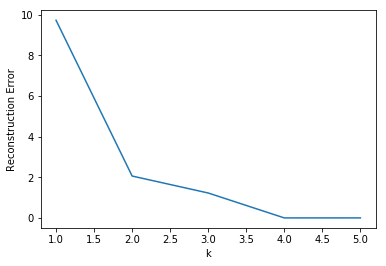

In [51]:
plt.plot(range(1, 6), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Error')
plt.show()

#### Fit using 3 hidden concepts

In [52]:
nmf = NMF(n_components=3)
nmf.fit(M)
W = nmf.transform(M)
H = nmf.components_;
print('RSS = %.2f' % nmf.reconstruction_err_)

RSS = 1.23


In [53]:
print(W.shape)
W

(7, 3)


array([[7.04390273e-01, 0.00000000e+00, 2.10081857e-01],
       [1.73235711e+00, 0.00000000e+00, 6.09161864e-01],
       [1.29421597e+00, 1.81488610e-03, 7.56004493e-01],
       [1.61776997e+00, 2.26860763e-03, 9.45005616e-01],
       [3.93832312e-01, 1.83979442e+00, 0.00000000e+00],
       [0.00000000e+00, 2.27886459e+00, 0.00000000e+00],
       [1.96916156e-01, 9.19897210e-01, 0.00000000e+00]])

In [54]:
print(H.shape)
H

(3, 5)


array([[0.00000000e+00, 3.02271437e+00, 1.84930723e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.12575553e-05, 1.97832190e-01, 0.00000000e+00, 2.18511960e+00,
        2.18511960e+00],
       [5.20678354e+00, 0.00000000e+00, 2.31451216e+00, 0.00000000e+00,
        0.00000000e+00]])

#### Make interpretable

In [55]:
movies = ['Matrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic']
users = ['Alice', 'Bob', 'Cindy', 'Dan', 'Emily', 'Frank', 'Greg']

W, H = (np.around(x, 2) for x in (W, H))
W = pd.DataFrame(W, index = users)
H = pd.DataFrame(H, columns=movies)

In [56]:
W # 每個元素都 >= 0

,0,1,2
Alice,0.70,0.00,0.21
Bob,1.73,0.00,0.61
Cindy,1.29,0.00,0.76
Dan,1.62,0.00,0.95
Emily,0.39,1.84,0.00
Frank,0.00,2.28,0.00
Greg,0.20,0.92,0.00


In [57]:
H # 每個元素都 >= 0

,Matrix,Alien,StarWars,Casablanca,Titanic
0,0.00,3.02,1.85,0.00,0.00
1,0.00,0.20,0.00,2.19,2.19
2,5.21,0.00,2.31,0.00,0.00


#### verify reconstruction

In [58]:
np.around(W.dot(H), 2) # WH 是數值近似解，所以不會跟 V 一模一樣

,Matrix,Alien,StarWars,Casablanca,Titanic
Alice,1.09,2.11,1.78,0.00,0.00
Bob,3.18,5.22,4.61,0.00,0.00
Cindy,3.96,3.90,4.14,0.00,0.00
Dan,4.95,4.89,5.19,0.00,0.00
Emily,0.00,1.55,0.72,4.03,4.03
Frank,0.00,0.46,0.00,4.99,4.99
Greg,0.00,0.79,0.37,2.01,2.01


In [59]:
pd.DataFrame(M, index=users, columns=movies) # M 就是公式裡面的 V

,Matrix,Alien,StarWars,Casablanca,Titanic
Alice,1,2,2,0,0
Bob,3,5,5,0,0
Cindy,4,4,4,0,0
Dan,5,5,5,0,0
Emily,0,2,0,4,4
Frank,0,0,0,5,5
Greg,0,1,0,2,2


#### Compare to SVD

In [60]:
from numpy.linalg import svd
k = 3

# SVD
U, sigma, VT = svd(M)

# Make pretty
U, sigma, VT = (np.around(x, 2) for x in (U, sigma, VT))
U = pd.DataFrame(U, index=users)
VT = pd.DataFrame(VT, columns=movies)

# # keep top two concepts
# U = U.iloc[:, :k]
# sigma = sigma[:k]
# VT = VT.iloc[:k, :]

In [61]:
print(U.shape)
U

(7, 7)


,0,1,2,3,4,5,6
Alice,-0.21,0.02,0.31,0.26,0.66,-0.51,0.33
Bob,-0.55,0.06,0.53,0.46,-0.33,0.25,-0.16
Cindy,-0.50,0.07,-0.31,-0.20,-0.37,-0.67,-0.18
Dan,-0.62,0.08,-0.39,-0.24,0.36,0.48,0.18
Emily,-0.12,-0.60,0.40,-0.52,0.20,-0.00,-0.40
Frank,-0.04,-0.73,-0.42,0.53,-0.00,0.00,-0.00
Greg,-0.06,-0.30,0.20,-0.26,-0.40,-0.00,0.80


In [62]:
print(sigma.shape)
sigma

(5,)


array([13.84,  9.52,  1.69,  1.02,  0.  ])

In [63]:
print(VT.shape)
VT

(5, 5)


,Matrix,Alien,StarWars,Casablanca,Titanic
0,-0.50,-0.62,-0.60,-0.06,-0.06
1,0.09,-0.05,0.11,-0.70,-0.70
2,-0.78,0.62,0.03,-0.07,-0.07
3,-0.36,-0.48,0.79,0.05,0.05
4,0.00,0.00,-0.00,-0.71,0.71


In [64]:
# keep top three concepts
U = U.iloc[:, :k]
sigma = sigma[:k]
VT = VT.iloc[:k, :]

In [65]:
U

,0,1,2
Alice,-0.21,0.02,0.31
Bob,-0.55,0.06,0.53
Cindy,-0.50,0.07,-0.31
Dan,-0.62,0.08,-0.39
Emily,-0.12,-0.60,0.40
Frank,-0.04,-0.73,-0.42
Greg,-0.06,-0.30,0.20


In [66]:
sigma

array([13.84,  9.52,  1.69])

In [67]:
VT

,Matrix,Alien,StarWars,Casablanca,Titanic
0,-0.50,-0.62,-0.60,-0.06,-0.06
1,0.09,-0.05,0.11,-0.70,-0.70
2,-0.78,0.62,0.03,-0.07,-0.07


### Interpreting concepts

* concept = cluster
* Each row can belong to more than one concept

#### If we want to cluster movies
* W: cluster centers
* H: cluster indicators

#### If we want to cluster users
* W: cluster indicators
* H: cluster centers

#### What is concept 0?

In [68]:
W # users x latent factor matrix

,0,1,2
Alice,0.70,0.00,0.21
Bob,1.73,0.00,0.61
Cindy,1.29,0.00,0.76
Dan,1.62,0.00,0.95
Emily,0.39,1.84,0.00
Frank,0.00,2.28,0.00
Greg,0.20,0.92,0.00


In [69]:
H # latent factors x movies

,Matrix,Alien,StarWars,Casablanca,Titanic
0,0.00,3.02,1.85,0.00,0.00
1,0.00,0.20,0.00,2.19,2.19
2,5.21,0.00,2.31,0.00,0.00


#### Top 2 movies in genre 0

In [70]:
top_movies = H.iloc[0].sort_values(ascending=False).index[:2]
top_movies

Index(['Alien', 'StarWars'], dtype='object')

#### Top 2 users for genre 1

In [71]:
top_users = W.iloc[:, 0].sort_values(ascending=False).index[:2]
top_users

Index(['Bob', 'Dan'], dtype='object')

#### What concepts does Emily align with?

In [72]:
W.loc['Emily']

0    0.39
1    1.84
2    0.00
Name: Emily, dtype: float64

#### What are all the movies in each concept?

In [73]:
# Number of movies in each concept
thresh = .2 # movie is included if at least 20% of max weight
for g in range(3): # 3 個 concepts
    all_movies = H.iloc[g,:]
    included = H.columns[all_movies >= (thresh * all_movies.max())]
    print('Concept %i contains: %s' % (g, ', '.join(included)))

Concept 0 contains: Alien, StarWars
Concept 1 contains: Casablanca, Titanic
Concept 2 contains: Matrix, StarWars


#### Which users are associated with each concept?

In [74]:
# Users in each concept
thresh = .2 # movie is included if at least 20% of max weight
for g in range(3): # 3 個 concepts
    all_users = W.iloc[:, g]
    included = W.index[all_users >= (thresh * all_users.max())]
    print('Concept %i contains: %s' % (g, ', '.join(included)))

Concept 0 contains: Alice, Bob, Cindy, Dan, Emily
Concept 1 contains: Emily, Frank, Greg
Concept 2 contains: Alice, Bob, Cindy, Dan


***
***
***

## UVD

* UVD 是數值近似解
  * 公式: \begin{equation} R_{m \times n} \approx U_{m \times k} V_{k \times n} \Rightarrow r_{ij} \approx u_{i:} \cdot v_{:j}\end{equation}
  * $k \ll min(m, n)$
  * $U$, $V$ 的元素都是 model 裡面的 weights
* loss function 是真實矩陣 $R$ 和恢復矩陣 $UV$ 之間的差別的 least squares
  \begin{equation} argmin \sum_{i,j}(r_{ij} - u_{i:}\cdot v_{:j})^2\end{equation}
  * $U$, $V$ 要使得 loss function 最小
  * 只觀測沒有 missing values 的那些 (就是有 rating 的)
  * 其實 loss function 就是 RMSE
    \begin{equation} RMSE = \sqrt{\sum_{u,i} (r_{u,i} - p_{u,i})^2}\end{equation}
    * $R$: 真實值，$r_{u,i}$ 是 user ($u$) 在 item ($i$) 真正的 rating
    * $P$: 預測值，$p_{u,i}$ 是 user ($u$) 在 item ($i$) 預測的 rating
* Gradient descent:
  * 一次只 update 一個，update 相應位置的 row 和 column，所以計算速度快
    \begin{equation}e_{x,i}^2 = (r_{x,i} - p_{x,i})^2 = (r_{x,i} - \sum U_{x,k}V_{k,i})^2\end{equation}
    \begin{equation}\frac{\partial e_{x,i}^2}{\partial U_{x,f}} = 2 e_{x,i} \cdot V_{f,i}\end{equation}
    \begin{equation}\frac{\partial e_{x,i}^2}{\partial V_{f,i}} = 2 e_{x,i} \cdot U_{x,f}\end{equation}
  * 公式:
    \begin{equation}U_{x,f}\ -= \alpha \cdot e_{x,i} \cdot V_{f,i}\end{equation}
    \begin{equation}V_{x,f}\ -= \alpha \cdot e_{x,i} \cdot U_{x,f}\end{equation}
    $\alpha$ 是 learning rate
* 通常 weight 很多，要加入 regularization 來克服 overfitting
  * 一般來說用 L2 regularization
    \begin{equation} argmin \sum_{i,j}(r_{ij} - u_{i:}\cdot v_{:j})^2 + \lambda(||u_{i:}||^2 + ||v_{:j}||^2)\end{equation}
* Bias 是 intercept
  * total bias = populatin bias + user bias + item bias
    \begin{equation}b_{ij} = \mu + b^{*}_{i} + b'_{j}\end{equation}
  * bias 項也可以放到 loss function 和 regularization 裡面
    \begin{equation}r{ij} \approx b_{ij} + u_{i:} \cdot v_{:j}\end{equation}
    \begin{equation} argmin \sum_{i,j}(r_{ij} - b_{ij} - u_{i:}\cdot v_{:j})^2\end{equation}    
    \begin{equation} argmin \sum_{i,j}(r_{ij} - b_{ij} - u_{i:}\cdot v_{:j})^2 + \lambda_{1}(||u_{i:}||^2 + ||v_{:j}||^2) + \lambda_{2} [(b^{*}_{i})^2 + (b'_{j})^2] \end{equation}
* 求 UVD 和 NMF 的解用
  * ALS: Alternating least squares
    * 平行計算
    * 原本不能處理 missing value，後來可以
  * SGD: stochastic gradient descent
    * 單一機器，計算速度快
    * 可以處理 missing value
    * 通常用 SGD
* Recommender system 一定要能處理 missing values

### Load data

In [75]:
import numpy as np
import pandas as pd

from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from time import time

In [76]:
df_ratings_contents = pd.read_table('u.data', names=['user', 'movie', 'rating', 'timestamp'])
df_ratings_contents.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [77]:
df_ratings_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user         100000 non-null int64
movie        100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [78]:
df_utility = pd.pivot_table(data=df_ratings_contents,
                            values='rating',
                            index='user',
                            columns='movie',
                            fill_value=0)
df_utility.head()

movie,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_utility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: int64(1682)
memory usage: 12.1 MB


In [80]:
highest_user_id = df_ratings_contents.user.max()
highest_movie_id = df_ratings_contents.movie.max()

In [81]:
ratings_mat = sparse.lil_matrix((highest_user_id, highest_movie_id))

In [82]:
for _, row in df_ratings_contents.iterrows():
    ratings_mat[row.user-1, row.movie-1] = row.rating

In [83]:
ratings_mat

<943x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in LInked List format>

### NMF

定義函數來做 NMF

In [84]:
from sklearn.decomposition import NMF

def fit_nmf(M, k): # M 就是公式裡面的 V
    nmf = NMF(n_components=k)
    nmf.fit(M)
    W = nmf.transform(M)
    H = nmf.components_
    err = nmf.reconstruction_err_
    return W, H, err

#### decompose

In [85]:
W, H, err = fit_nmf(ratings_mat, 200)

In [86]:
print(W.shape)
W

(943, 200)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.19018228,
        0.08722629],
       [0.        , 0.04301125, 0.57509352, ..., 0.22315134, 0.13082276,
        0.        ],
       [0.26664133, 0.        , 0.89480281, ..., 0.        , 0.11300444,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.13419628,
        0.        ],
       [0.34013817, 0.01395016, 0.        , ..., 0.20647204, 0.13462109,
        0.        ],
       [0.19867538, 0.08023821, 0.        , ..., 0.        , 0.2060187 ,
        0.        ]])

In [87]:
print(H.shape)
H

(200, 1682)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02042041, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0311293 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [88]:
print(err.shape)
err

()


602.9175273298551

#### reconstruct

求出了 $W$ 和 $H$ 之後，可以重建 $V$

In [89]:
ratings_mat_fitted = W.dot(H)
ratings_mat_fitted

array([[4.99722321e+00, 3.04177923e+00, 3.85646376e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95604714e-02],
       [4.08264065e+00, 1.02805940e-02, 9.05893711e-02, ...,
        1.86901895e-02, 1.32218324e-07, 3.66952446e-03],
       [2.12109083e-02, 2.27384351e-02, 0.00000000e+00, ...,
        4.80699063e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.87597419e+00, 3.10899714e-02, 5.28825945e-02, ...,
        1.85998253e-04, 0.00000000e+00, 0.00000000e+00],
       [9.03455357e-02, 4.75741671e-01, 0.00000000e+00, ...,
        6.42733105e-03, 2.47982633e-07, 2.99376556e-03],
       [5.55466676e-02, 2.84537326e+00, 1.76614404e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.28396168e-01]])

In [90]:
errs = np.array((ratings_mat - ratings_mat_fitted).flatten()).squeeze()
mask = np.array((ratings_mat.todense()).flatten()).squeeze() > 0

In [91]:
mse = np.mean(errs[mask]**2)
average_abs_err = abs(errs[mask]).mean()
print(mse)
print(average_abs_err)

2.5402018582435115
1.0865343097665563


get recommendations for one user

In [92]:
user_id = 100
n = 10

pred_ratings = ratings_mat_fitted[user_id, :]
item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings))[::-1]

items_rated_by_this_user = ratings_mat[user_id].nonzero()[1]

unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating if item not in items_rated_by_this_user]
unrated_items_by_pred_rating[:n]

[475, 273, 684, 590, 290, 234, 863, 147, 125, 454]

#### check errors

truth

In [93]:
ratings_true = ratings_mat[user_id, items_rated_by_this_user].todense()

prediction

In [94]:
ratings_pred = pred_ratings[items_rated_by_this_user]
print(list(zip(np.array(ratings_true).squeeze(), ratings_pred)))

[(3.0, 2.9697826360194974), (3.0, 2.9055149324796092), (4.0, 1.6024541111949597), (4.0, 4.143181181434142), (2.0, 1.2441311189608113), (2.0, 3.366244412987652), (4.0, 4.160472277911375), (3.0, 3.372998967112563), (4.0, 4.422605694984924), (1.0, 0.5266661329538885), (2.0, 1.1898177632188307), (4.0, 2.6172093624823316), (4.0, 3.869569127376433), (3.0, 2.704079787799628), (4.0, 3.8439150618229894), (3.0, 2.8282547106943605), (3.0, 1.1473345369196983), (5.0, 4.580523683685838), (3.0, 1.4921640568832535), (4.0, 2.5780070067087077), (4.0, 4.133510957221417), (2.0, 1.0277561737178114), (3.0, 1.4198414617868376), (2.0, 1.4105648796959793), (3.0, 3.102991877472554), (4.0, 1.864190834690939), (4.0, 3.95063455612818), (3.0, 0.2907393558961638), (2.0, 0.6678015364250083), (2.0, 0.5507096258262099), (4.0, 3.652967958962136), (2.0, 2.019281762196318), (2.0, 0.5559709018287156), (3.0, 3.220459115281283), (3.0, 1.7420968931474494), (4.0, 3.00985505568074), (2.0, 1.0192882076813363), (3.0, 0.9052756152

In [95]:
err_one_user = ratings_true - ratings_pred
print(err_one_user)
print(abs(err_one_user).mean())

[[ 0.03021736  0.09448507  2.39754589 -0.14318118  0.75586888 -1.36624441
  -0.16047228 -0.37299897 -0.42260569  0.47333387  0.81018224  1.38279064
   0.13043087  0.29592021  0.15608494  0.17174529  1.85266546  0.41947632
   1.50783594  1.42199299 -0.13351096  0.97224383  1.58015854  0.58943512
  -0.10299188  2.13580917  0.04936544  2.70926064  1.33219846  1.44929037
   0.34703204 -0.01928176  1.4440291  -0.22045912  1.25790311  0.99014494
   0.98071179  2.09472438  0.25317427  1.66468834  1.0423618   0.97259719
   1.32654681  1.25311556  0.30624611  2.07785052  2.3714987   2.55072561
   2.15432573  2.42860737  1.35944296  0.83871986  2.4127354   1.60583132
   3.39495604  1.54696445  0.75659118  1.23567692  1.54881616  1.61769255
   1.05178031  1.64139704  0.53320175  1.13198995  1.95562714  0.88715337
   2.62507379]]
1.1540301101335124


### UVD / SVD

* UVD 就是 truncated SVD

In [96]:
from sklearn.decomposition import TruncatedSVD

def fit_uvd(M, k):
    # use TruncatedSVD to realize UVD
    svd = TruncatedSVD(n_components=k, n_iter=7, random_state=0)
    svd.fit(M)
    
    V = svd.components_
    U = svd.transform(M) # 相當於 U = M.dot(V.T)
    
    return U, V, svd

#### decompose

In [97]:
U, V, svd = fit_uvd(ratings_mat, 200)

In [98]:
print(U.shape, V.shape)

(943, 200) (200, 1682)


#### reconstruct

In [99]:
ratings_mat_fitted = U.dot(V)

#### calculate errors

In [100]:
errs = np.array((ratings_mat - ratings_mat_fitted).flatten()).squeeze()
mask = np.array((ratings_mat.todense()).flatten()).squeeze() > 0

mse = np.mean(errs[mask]**2)
average_abs_err = abs(errs[mask]).mean()
print(mse)
print(average_abs_err)

1.035525472340896
0.7549828200027933


reconstruct $M$ with inverse_transform

In [101]:
ratings_mat_fitted_2 = svd.inverse_transform(svd.transform(ratings_mat))
ratings_mat_fitted = U.dot(V)
print(sum(sum(ratings_mat_fitted - ratings_mat_fitted_2)))

0.0


get the recommendations for one user

In [102]:
user_id = 100
n = 10

pred_ratings = ratings_mat_fitted[user_id, :]
item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings))[::-1]

items_rated_by_this_user = ratings_mat[user_id].nonzero()[1]

unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating if item not in items_rated_by_this_user]
unrated_items_by_pred_rating[:n]

[475, 684, 409, 863, 454, 147, 24, 273, 239, 933]

#### check errors

truth

In [103]:
ratings_true = ratings_mat[user_id, items_rated_by_this_user].todense()

prediction

In [104]:
rarings_pred = pred_ratings[items_rated_by_this_user]
print(list(zip(np.array(ratings_true).squeeze(), ratings_pred)))
err_one_user = ratings_true - ratings_pred
print(err_one_user)
print(abs(err_one_user).mean())

[(3.0, 2.9697826360194974), (3.0, 2.9055149324796092), (4.0, 1.6024541111949597), (4.0, 4.143181181434142), (2.0, 1.2441311189608113), (2.0, 3.366244412987652), (4.0, 4.160472277911375), (3.0, 3.372998967112563), (4.0, 4.422605694984924), (1.0, 0.5266661329538885), (2.0, 1.1898177632188307), (4.0, 2.6172093624823316), (4.0, 3.869569127376433), (3.0, 2.704079787799628), (4.0, 3.8439150618229894), (3.0, 2.8282547106943605), (3.0, 1.1473345369196983), (5.0, 4.580523683685838), (3.0, 1.4921640568832535), (4.0, 2.5780070067087077), (4.0, 4.133510957221417), (2.0, 1.0277561737178114), (3.0, 1.4198414617868376), (2.0, 1.4105648796959793), (3.0, 3.102991877472554), (4.0, 1.864190834690939), (4.0, 3.95063455612818), (3.0, 0.2907393558961638), (2.0, 0.6678015364250083), (2.0, 0.5507096258262099), (4.0, 3.652967958962136), (2.0, 2.019281762196318), (2.0, 0.5559709018287156), (3.0, 3.220459115281283), (3.0, 1.7420968931474494), (4.0, 3.00985505568074), (2.0, 1.0192882076813363), (3.0, 0.9052756152

***
***
***

# 比較

|比較|PCA|SVD|NMF|UVD|
|:---:|:---:|:---:|:---:|:---:|
|解|解析解|解析解|數值解|數值解|
|限制條件|無|無|非負|無|
|Dimension reduction|可|可|可|可|
|Data compression|可|可|可|可|
|latent factor 和 clustering|不明顯|可|可|可|
|模型解釋能力|難|latent factor 解釋|latent factor 解釋|latent factor 解釋|
|推薦系統|不可|不可|可|可|
|Missing data imputation|不可|不可|可|可|
|其他|PCA 由 SVD 來實作，PCA 的 eigenvalues 是 SVD 的 singular values 的平方|計算比 PCA 速度快|就是 UVD 加上非負的限制|train 快|

***
***
***

# Recommendation

* Recommendation 其實就是一個 missing value imputation 的過程
* Recommender 分成
  * Popularity: 每個人都推薦一樣的，最容易實作
    * clustering: 把用戶分成不同的 clusters，同一個 cluster 的用戶推薦一樣的東西，是一個比較粗糙的手法
      * (優點)容易實作
      * (優點)可以顯現 latent similarity 
      * (缺點)performance 差，variance 低 (因為同一個 cluster 的用戶都差不多)，bias 高
      * 通常是用 clustering 做預處理，對用戶分群，然後對每個 cluster 的用戶做 collaborative filtering 或 matrix factorization
        * 相當減低了數據的大小
  * Content based: 由用戶的 content 和 item 的 content 比較，推薦類似的 contents
    * user 的 content 就是 user preference
    * item 的 content 就是 item 的屬性
      * test-based content 可以用 NLP 提取
      * image-based content 可以用 deep learning 提取
    * 用 cosine similarity 或 eucildean distance 等 similarity metrics
    * (優點)適合 cold-start (就是一開始什麼數據都沒有的情況)
      * 不論是 user 的數據或是 item 的數據
      * 新的 item 或不是受歡迎的 item (所以沒什麼數據) 就可以用 cold-start
    * (優點)容易解釋 (把 content 的 feature 列出來就可以)
    * (缺點)需要提取 content 來學習，可能有些 feature 不好提取，或是不能轉成能用的屬性
    * (缺點)沒有借助到相似 user 和相似 item 的數據，所以 performance 不夠好
    * (缺點)容易 overfit
  * Collaborative filtering: 由用戶的行為來判斷
    * 數據會是一個 sparse 的 utility matrix
      * row: user, col: item, cell: rating
      * 沒有 rating 的 cell 就是 missing，目標是預測這些，但是通常 missing 的數目遠大於有 rating 的
    * 通常會選一部分當 neighbors 用來加速計算，但是這不是必要的步驟
    * 有 **user-based** 和 **item-based** 兩種
    * user-based:
      * 要定義 target user，還有找和 target user 相似的 users，由相似的 users 的 rating 來預測 target user 尚未 rating 的項目的 rating，會考慮有 rating 和沒有 rating 的項目之間的相似性，並當成權重拿來預測 rating
      
      * (優點) performance 好，(缺點)users 多的時候速度慢 (因為每個 user 都要計算)
    * item-based:
      * 一般來說 Item based 的 CF 比較常用
      * Users 數目 >> items 數目時就用 item-based
      * (優點)速度快，數據穩定，data 比較不 sparse
    * User-user similarity
      * 時間複雜度是 user 數目的平方 x item 數目 
      * 第 i 項的 rating 是由第 j 項的 rating 與 (i, j) 兩項的相似度來求得，並且要 normalize
        \begin{equation} rating(u, i) = \frac{\sum similarity(i, j) \cdot rating(u, j)}{\sum similarity(i, j)}\end{equation}
      * 通常只會用 neighbors (就是一部分的 item) 來計算，以提高計算速度
    * Item-item similarity
      * 時間複雜度是 user 數目 x item 數目的平方
      * 公式和 user-user similarity 一樣
    * Similarity:
      * Euclidean distance
        \begin{equation}dist(a, b) = \sqrt{\sum_{i} (a_{i} - b_{i})^{2}}\end{equation}
        similarity 是介於 0 ~ 1 之間
        \begin{equation}similarity(a, b) = \frac{1}{1+dist(a,b)}\end{equation}
      * Pearson correlation: -1 ~ 1
        \begin{equation}Pearson(a, b) = \frac{cov(a,b)}{\sigma(a) \sigma(b)}=\frac{\sum_{i}(a_{i}-\bar{a})(b_{i}-\bar{b})}{\sqrt{\sum_{i}(a_{i}-\bar{a})^2}\sqrt{\sum_{i}(b_{i}-\bar{b})^2}}\end{equation}
        similarity: 0 ~ 1
        \begin{equation}similarity(a, b) = 0.5 + 0.5 * Pearson(a, b)\end{equation}
      * Cosine similarity: -1 ~ 1
        \begin{equation} \cos(\theta_{a,b}) = \frac{a \cdot b}{|a||b|} = \frac{\sum_{i}a_{i}b_{i}}{\sqrt{\sum_{i}a_{i}^2}\sqrt{\sum_{i}b_{i}^2}}\end{equation}
        similarity: 0 ~ 1
        \begin{equation}similarity(a, b) = 0.5 + 0.5 * \cos(\theta_{a,b})\end{equation}
      * Jaccard similarity: 0 ~ 1
        \begin{equation}similarity(a, b) = \frac{|U_a \cap U_b|}{|U_a \cup U_b|}\end{equation}
    * cross validation:
      * 不可以用傳統的方式用不同的 row 分 train 和 test 因為 CF 要用全部的 users 和 item 的 data
      * 在 utility matrix 上隨機 mask 掉一些數據，被 mask 掉的當成 holdout set，拿沒有 mask 的 train，拿 holdout set 來 evaluation，但是因為不是用全部的數據來 train，performance 會比較差
        * 不可以整個 row 或整個 column 被 mask
        * train 完後拿掉 mask 再用全部的數據 train 一次
  * Matrix factorization: 其實就是 missing value imputation
    * 用矩陣填充，把用戶沒填的 item 去填上權重
    * 不可以用 SVD，因為 SVD 是解析解，不可以有 missing values
    * 用 UVD + SGD (stochastic gradient descent)

***
***
***

## Item-item collaborative filter recommender

In [105]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from time import time

### Load data

In [106]:
df_rating_contents = pd.read_table('u.data', names=['user', 'movie', 'rating', 'timestamp'])
df_rating_contents.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [107]:
df_rating_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user         100000 non-null int64
movie        100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [108]:
df_rating_contents.describe()

,user,movie,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [109]:
df_rating_contents['user'].nunique()

943

In [110]:
df_rating_contents['movie'].nunique()

1682

有 10 萬列，但只有 943 個 users 和 1682 個 movies，表示可能有同一個 user 但 movies 不同的列

### Convert rating records to user-movie utility matrix

#### Option 1: use `pd.pivot_table()`
* 以 `user` 當 row, `movie` 當 column, `rating` 當 value

In [111]:
df_utility = pd.pivot_table(data=df_rating_contents,
                            index='user',
                            columns='movie',
                            values='rating',
                            fill_value=0)
df_utility.head()

movie,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df_utility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: int64(1682)
memory usage: 12.1 MB


### Option 2: use spare matrix `scipy.sparse.lil_matrix()`

In [113]:
highest_user_id = df_rating_contents.user.max()
highest_movie_id = df_rating_contents.movie.max()
print(highest_user_id)
print(highest_movie_id)

943
1682


建立一個空的矩陣，用 sparse matrix 來節省空間

sparse matrix 有 lil, csr, csc 三種
* `lil_matrix()`
* `csr_matrix()`
* `csc_matrix()`

`sparse.lil_matrix((m, n))` 建立 $m \times n$ 的空的 sparse matrix

In [114]:
ratings_mat = sparse.lil_matrix((highest_user_id, highest_movie_id)) # empty matrix
ratings_mat # this is linked list form

<943x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [115]:
ratings_mat.todense() # show matrix form

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

把 rating 當作矩陣元素填入

因為 user 和 movie 都是從 1 開始，但是矩陣元素從 0 開始，所以要減一

In [116]:
for index, row in df_rating_contents.iterrows():
#     print(index, row.user, row.movie, row.rating)
    ratings_mat[row.user-1, row.movie-1] = row.rating

In [117]:
ratings_mat

<943x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in LInked List format>

In [118]:
ratings_mat.todense() # the same as df_utility

matrix([[5., 3., 4., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 5., 0., ..., 0., 0., 0.]])

In [119]:
diff = df_utility.values - ratings_mat.todense()
diff

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

`np.any()`: Test whether any array element along a given axis evaluates to True.

In [120]:
np.any(diff) # 是否有任何非 0 的值

False

### Use option 2

In [121]:
utility_mat = ratings_mat
print(utility_mat.shape)

(943, 1682)


### Item-item similarity matrix

In [122]:
item_sim_mat = cosine_similarity(utility_mat.T) # item 是欄，要 transpose 才能看 item to item 的 cosine similarity

In [123]:
print(item_sim_mat.shape)
item_sim_mat

(1682, 1682)


array([[1.        , 0.40238218, 0.33024479, ..., 0.        , 0.04718307,
        0.04718307],
       [0.40238218, 1.        , 0.27306918, ..., 0.        , 0.07829936,
        0.07829936],
       [0.33024479, 0.27306918, 1.        , ..., 0.        , 0.        ,
        0.09687505],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.09687505, ..., 0.        , 0.        ,
        1.        ]])

### Neighborhood

In [124]:
least_to_most_sim_indexes = np.argsort(item_sim_mat, axis=1)

In [125]:
least_to_most_sim_indexes # 把 cosine similarity 由小排到大，然後顯示 index 的順序

array([[1556, 1579, 1616, ...,  180,   49,    0],
       [1201, 1524, 1240, ...,  160,  232,    1],
       [ 676, 1463, 1464, ...,  762,  409,    2],
       ...,
       [   0, 1125, 1124, ..., 1677, 1678, 1679],
       [ 840, 1120, 1119, ..., 1350, 1671, 1680],
       [ 840,  934,  933, ..., 1334,  766, 1681]])

In [126]:
# Neighborhoods
neighborhood_size = 75
neighborhoods = least_to_most_sim_indexes[:, -neighborhood_size:]

neighborhoods.shape

(1682, 75)

### Rating prediction on a user

In [127]:
user_id = 100 # 只看這個使用者

In [128]:
ratings_mat[user_id].nonzero() # first array is row index, second array is column index

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int32),
 array([   0,    6,   23,   49,  108,  110,  116,  117,  120,  121,  122,
         124,  146,  150,  180,  221,  224,  236,  251,  254,  256,  277,
         279,  280,  281,  283,  287,  303,  368,  369,  404,  410,  411,
         470,  471,  545,  594,  595,  596,  716,  741,  755,  762,  814,
         818,  819,  825,  828,  830,  839,  840,  844,  845,  865,  923,
         925,  927,  974,  978, 1008, 1027, 1033, 1046, 1050, 1056, 1092,
        1131], dtype=int32))

In [129]:
n_users = utility_mat.shape[0]
n_items = utility_mat.shape[1]
print(n_users, n_items)

start_time = time()
items_rated_by_this_user = ratings_mat[user_id].nonzero()[1] # 選出非 0 的欄位

out = np.zeros(n_items)
for item_to_rate in range(n_items):
    relevant_items = np.intersect1d(neighborhoods[item_to_rate], # 找 neighborhoods 和 items_rated_by_this_user 的交集
                                    items_rated_by_this_user,
                                    assume_unique=True) # assume_unique 可以加速 intersect1d() 的計算
    out[item_to_rate] = ratings_mat[user_id, relevant_items] * \
                        item_sim_mat[item_to_rate, relevant_items] / \
                        item_sim_mat[item_to_rate, relevant_items].sum()
    
pred_ratings = np.nan_to_num(out) # out 中的 NaN 會被改成 0
print(pred_ratings)
print('Execution time: %f seconds' % (time() - start_time))

943 1682


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


[3.53360198 4.         3.22344621 ... 0.         0.         2.        ]
Execution time: 0.337194 seconds


In [130]:
pred_ratings.shape

(1682,)

### Get final recommendations for a user

In [131]:
# Recommend n movies
n = 10

# Get item indexes sorted by predicted rating
item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings))[::-1] # 由大排到小

# Find items that have been rated by user
item_rated_by_this_user = ratings_mat[user_id].nonzero()[1]

# We want to exclude the items that have been rated by user
unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating
                                if item not in items_rated_by_this_user]

unrated_items_by_pred_rating[:n]

[1357, 1136, 962, 339, 296, 314, 306, 315, 240, 650]

***
***
***

## Item-item collaborative filter recommender OOP

基本上和上面的例子一樣，只是改成了 OOP

In [132]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from time import time

In [133]:
class ItemItemRecommender(object):
    def __init__(self, neighborhood_size):
        self.neighborhood_size = neighborhood_size
        
    def fit(self, ratings_mat):
        self.ratings_mat = ratings_mat
        self.n_users = ratings_mat.shape[0]
        self.n_items = ratings_mat.shape[1]
        self.item_sim_mat = cosine_similarity(self.ratings_mat.T)
        self._set_neighborhoods()
    
    def _set_neighborhoods(self):
        lest_to_most_sim_indexes = np.argsort(self.item_sim_mat, 1) # 沿著 axis=1 由小到大排序
        self.neighborhoods = least_to_most_sim_indexes[:, -self.neighborhood_size:]
        
    def pred_one_user(self, user_id, report_run_time=False):
        start_time = time()
        items_rated_by_this_user = self.ratings_mat[user_id].nonzero()[1]
        # Just initializing so we have somewhere to put rating preds
        out = np.zeros(self.n_items)
        for item_to_rate in range(self.n_items):
            relevant_items = np.intersect1d(self.neighborhoods[item_to_rate],
                                            items_rated_by_this_user,
                                            assume_unique = True) # assume_unique speeds up intersection op
            out[item_to_rate] = self.ratings_mat[user_id, relevant_items] * \
                                self.item_sim_mat[item_to_rate, relevant_items] / \
                                self.item_sim_mat[item_to_rate, relevant_items].sum()
        if report_run_time:
            print('Execution time: %f seconds' % (time() - start_time))
        cleaned_out = np.nan_to_num(out)
        return cleaned_out
    
    def pred_all_users(self, report_run_time=False):
        start_time = time()
        all_ratings = [self.pred_one_user(user_id) for user_id in range(self.n_users)]
        if report_run_time:
            print('Execution time: %f seconds' % (time() - start_time))
        return np.array(all_ratings)
    
    def top_n_recs(self, user_id, n):
        pred_ratings = self.pred_one_user(user_id)
        item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings)) # 由小排到大
        items_rated_by_this_user = self.ratings_mat[user_id].nonzero()[1]
        unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating
                                        if item not in items_rated_by_this_user]
        return unrated_items_by_pred_rating[-n:] # 由小排到大

In [134]:
def get_ratings_data():
    ratings_contents = pd.read_table('u.data', names=['user', 'movie', 'rating', 'timestamp'])
    highest_user_id = ratings_contents.user.max()
    highest_movie_id = ratings_contents.movie.max()
    ratings_as_mat = sparse.lil_matrix((highest_user_id, highest_movie_id))
    for _, row in ratings_contents.iterrows():
        # subtract 1 from id's due to match 0 indexing
        ratings_as_mat[row.user-1, row.movie-1] = row.rating
    return ratings_contents, ratings_as_mat

In [135]:
ratings_data_contents, ratings_mat = get_ratings_data()
my_rec_engine = ItemItemRecommender(neighborhood_size=75)
my_rec_engine.fit(ratings_mat)
user_1_preds = my_rec_engine.pred_one_user(user_id=1, report_run_time=True)

# Show predicted ratings for user #1 on first 100 items
print(user_1_preds[:100]) # user id 1 對 100 個電影的 rating
print(my_rec_engine.top_n_recs(2, 20)) # user id 2 的電影 rating 前 20 名

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


Execution time: 0.336443 seconds
[3.92096581 0.         4.22667191 5.         3.         4.12129974
 4.12270715 4.51573763 4.25033325 3.96728146 4.52131811 4.77319571
 4.28984574 4.22706266 3.95359729 4.2187375  4.         0.
 4.08150983 4.09468117 4.49941837 4.68221743 5.         4.29167448
 3.98811888 4.         0.         4.50048038 0.         0.
 5.         4.51098255 0.         1.         0.         0.
 0.         0.         4.         0.         0.         5.
 0.         0.         4.03896789 0.         5.         5.
 4.         4.024775   0.         2.         0.         0.
 4.65424237 4.77517535 4.44008013 5.         4.40553798 4.
 4.         0.         0.         4.76072256 0.         5.
 0.         0.         4.51901327 4.68065509 4.50077081 0.
 5.         0.         0.         5.         0.         0.
 4.53169888 0.         5.         4.52477679 4.68393868 0.
 3.         5.         4.67728455 5.         5.         0.
 4.50554461 4.         4.1675315  0.         4.4892519  4.

In [136]:
my_rec_engine.pred_one_user(100) # user id 100 對電影的 rating

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


array([3.53360198, 4.        , 3.22344621, ..., 0.        , 0.        ,
       2.        ])

In [137]:
my_rec_engine.pred_one_user(100).size

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


1682

In [138]:
my_rec_engine.top_n_recs(100, 10) # 由小排到大

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


[650, 240, 315, 306, 314, 296, 339, 962, 1136, 1357]

In [139]:
my_rec_engine.top_n_recs(100, 10)[::-1] # 由大排到小

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


[1357, 1136, 962, 339, 296, 314, 306, 315, 240, 650]

***
***
***

# Recommender with Graphlab Create

要先註冊然後安裝 Graphlab

In [ ]:
import numpy as np
import graphlab
import pandas as pd
import matplotlib.pyplot as plt

## Load data

Load data in Dato's SFrame type

In [ ]:
df = pd.read_table('u.data', names=['user', 'movie', 'rating', 'timestamp'])
sf = graphlab.SFrame(df[['user', 'movie', 'rating']])

## Create a matrix factorization model

In [ ]:
rec = graphlab.recommender.factorization_recommender.create(
    sf,
    user_id='user',
    item_id='movie',
    target='rating',
    solver='als',
    side_data_factorization=False
)

## Prediction

### 預測 user 1 對 movie 100 的評分是多少？

用 `predict()`

In [ ]:
one_datapoint_sf = graphlab.SFrame({'user': [1], 'movie': [100]})

In [ ]:
one_datapoint_sf

In [ ]:
print('rating:', rec.predict(one_datapoint_sf)[0])

#### 檢查 model 中存了什麼樣的 data

用 `list_fields()`

In [ ]:
rec.list_fields()

#### 檢查輸出

In [ ]:
rec['coefficients']

#### 檢查維度

In [ ]:
movie_sf = rec['coefficients']['movie']
print(len(movie_sf))
print(len(movie_sf['factors'][0]))

user_sf = rec['coefficients']['user']
print(len(user_sf))
print(len(user_sf['factors'][0]))

### 計算預測的評分

不要用 `predict()` 改成自己預測評分

In [ ]:
movie_array = movie_sf[movie_sf['movie'] == 100]['factors'][0]
user_array = user_sf[user_sf['user'] == 1]['factors'][0]

intercept = rec['coefficients']['intercept']
print('rating:', np.dot(movie_array, user_array) + intercept)

intercept term 是 scaling factor，可以由原始數據中算全部 rating 平均來得到

In [ ]:
print('intercept:', intercept)
print('average:', np.average(sf['rating']))

### 預測全部的評分

In [ ]:
sf

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = rec.predict(sf)
rmse = np.sqrt(mean_squared_error(sf['rating'], predictions))

print("graphlab's reported rmse:", rec['training_rmse'])
print('calculated rmse:', rmse)

#### 比較統計資料

用 `pd.Series.describe()`

In [ ]:
pd.Series(sf['rating']).describe()

In [ ]:
pd.Series(predictions).describe()

## Regularization

In [ ]:
random_seed = 0
rec2 = graphlab.recommender.factorization_recommender.create(
    sf,
    user_id='user',
    item_id='movie',
    target='rating',
    solver='als',
    side_data_factorization=False,
    regularization=0,
    random_seed=random_seed
)
print('Training RMSE with regularization 0:', rec2['training_rmse'])

regularization_param = 1e-4
rec3 = graphlab.recommender.factorization_recommender.create(
    sf,
    user_id='user',
    item_id='movie',
    target='rating',
    solver='als',
    side_data_factorization=False,
    regularization=regularization_param,
    random_seed=random_seed
)
print('Training RMSE with regularization %s:' % regularization_param, rec3['training_rmse'])

## Model tuning to find the best parameters

In [ ]:
kfolds = graphlab.cross_validation.KFold(sf, 5)
params = dict(user_id='user',
              item_id='movie',
              target='rating',
              solver='als',
              side_data_factorization=False)

param_search = graphlab.model_parameter_search.creat(
    kfolds,
    graphlab.recommender.factorization_recommender.create,
    params
)

In [ ]:
param_search.get_status()

#### Best models by different metrics

In [ ]:
from pprint import pprint

print('Best params by recall@5:')
pprint(param_search.get_best_params('mean_validation_recall@5'))

print('Best params by precision@5:')
pprint(param_search.get_best_params('mean_validation_precision@5'))

print('Best params by rmse:')
pprint(param_search.get_best_params('mean_validation_rmse'))

#### Latent features

In [ ]:
lf_df = df.set_index(['user', 'movie'])[['rating']].unstack().fillna(0)
lf_df

In [ ]:
from scipy.spatial.distance import cdist

lf_df = df.set_index(['user', 'movie'])[['rating']].unstack().fillna(0)
user_df = user_sf[['user', 'factors']].sort('user').unpack('factors').to_dataframe()
corr = cdist(lf_df.values.T, user_df.values.T, 'correlation')
corr_df = pd.DataFrame(corr)
corr_df.index = lf_df.columns.get_loc_level('rating')[1]

col_names = ['movie_id', 'movid_title', 'release_date',
             'video_release_date', 'imdb_url', 'unknown',
             'action', 'adventure', 'animation',
             "children\'s", 'comedy', 'crime',
             'documentary', 'drama', 'fantasy',
             'film-noir', 'horror', 'musical', 'mystery',
             'romance', 'sci-fi', 'thriller', 'war',
             'western']

movies = pd.read_table('u.item', sep='|', index_col=0, header=None, names=col_names)
movies_with_corr = pd.concat([novies, corr_df], axis=1)

In [ ]:
for i in xrange(1, 9):
    print('Top movies for factor {0}:'.format(i))
    top_five_movies = movies_with_corr.sort([i], ascending=False)['movie title'][:5]
    print('    ' + '\n    ' .join(top_five_movies) + '\n')

#### Topic topics for each latent feature

In [ ]:
from collections import Counter

print('Top topics for each factor:')
for i in xrange(1, 9):
    scores = Counter()
    for topic in ['action', 'adventure', 'animation', "children\'s'",
                  'comedy', 'crime', 'documentary', 'drama', 'fantasy',
                  'film-noir', 'horror', 'musical', 'mystery', 'romance',
                  'sci-fi', 'thriller', 'war', 'western']:
        scores[topic] = np.dot(movies_with_corr[i], movies_with_corr[topic]) / np.sum(movies_with_corr[topic])
    top_topics = [topic for topic, score in scores.most_common(3)]
    print('    Factor {0}: {1}'.format(i, ', '.join(top_topics)))